<a href="https://colab.research.google.com/github/JayPrakash189/human-activity-recognition-imu/blob/main/Human_Activity_Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import zipfile

with zipfile.ZipFile("UCI HAR Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [21]:
import pandas as pd

X_train = pd.read_csv("data/UCI HAR Dataset/train/X_train.txt", sep=r'\s+', header=None)
y_train = pd.read_csv("data/UCI HAR Dataset/train/y_train.txt", header=None)

print(X_train.shape)
print(y_train.shape)



(7352, 561)
(7352, 1)


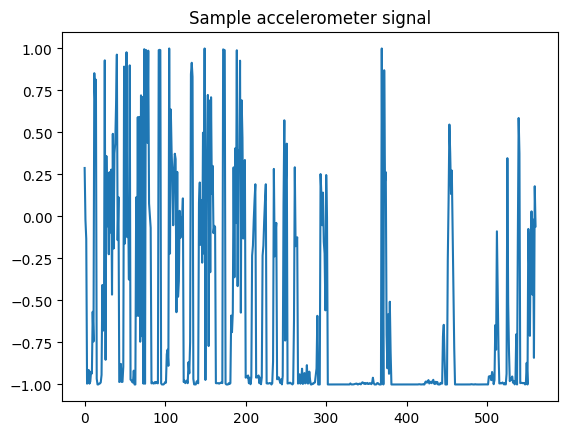

In [22]:
import matplotlib.pyplot as plt

plt.plot(X_train.iloc[0])
plt.title("Sample accelerometer signal")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2
)

model = RandomForestClassifier()
model.fit(X_train_split, y_train_split.values.ravel())

pred = model.predict(X_test_split)

print("Accuracy:", accuracy_score(y_test_split, pred))


Accuracy: 0.9857239972807614


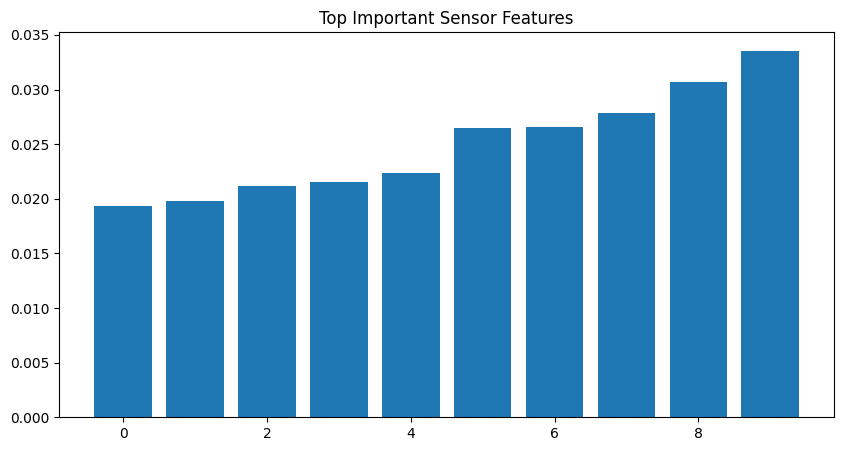

In [24]:
import numpy as np

importances = model.feature_importances_

# show top important features
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,5))
plt.title("Top Important Sensor Features")
plt.bar(range(len(indices)), importances[indices])
plt.show()


In [25]:
activity_map = {
    1:"Walking",
    2:"Walking Upstairs",
    3:"Walking Downstairs",
    4:"Sitting",
    5:"Standing",
    6:"Laying"
}

y_train['activity'] = y_train[0].map(activity_map)

print(y_train.head())



   0  activity
0  5  Standing
1  5  Standing
2  5  Standing
3  5  Standing
4  5  Standing


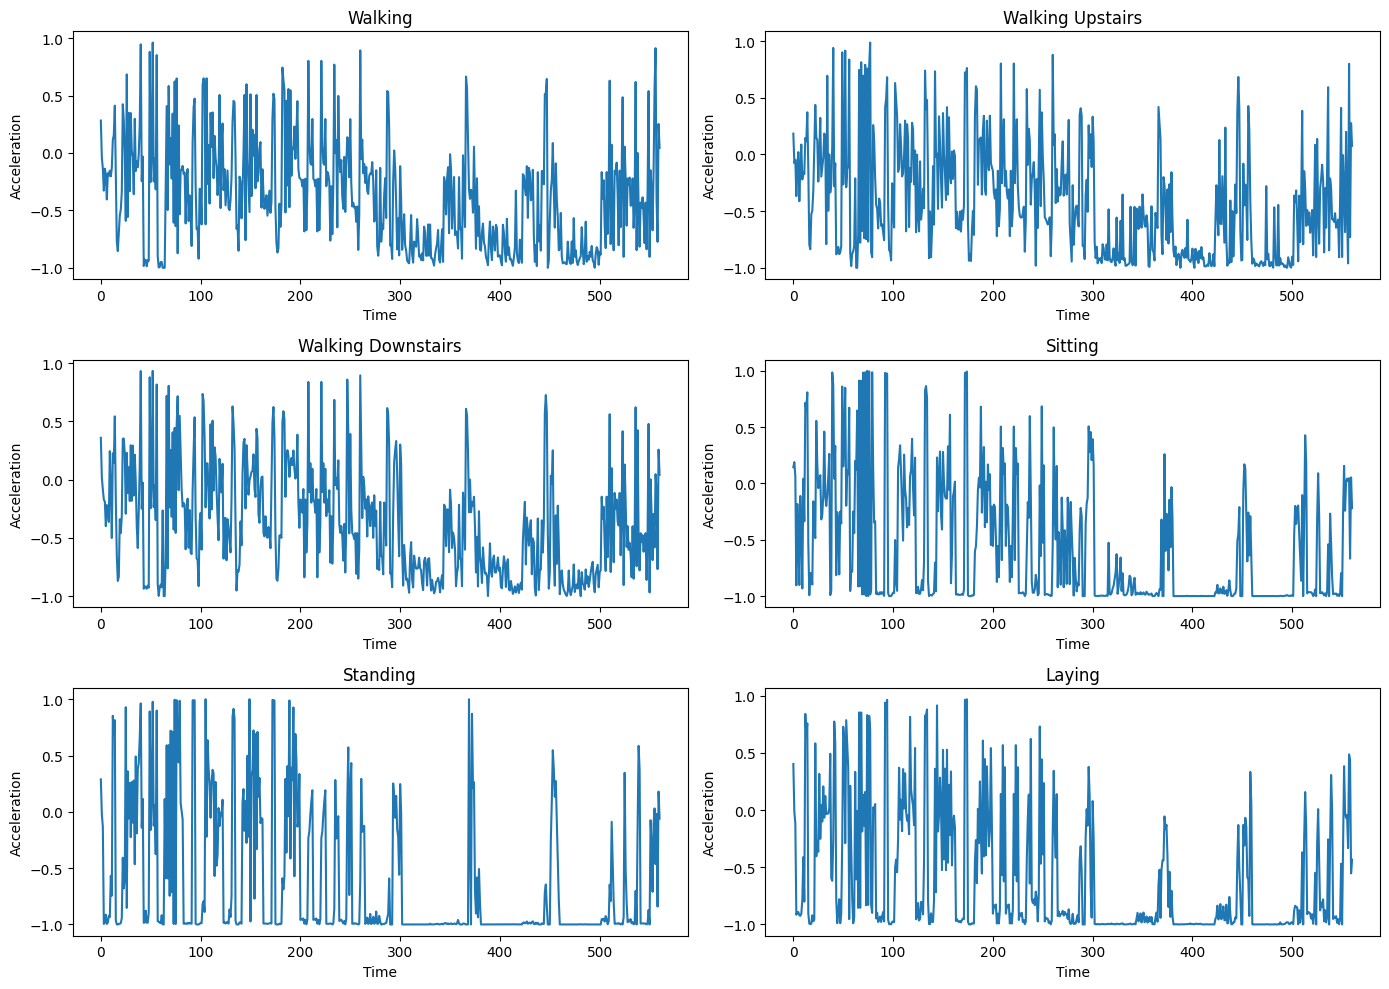

In [26]:
plt.figure(figsize=(14,10))

for i, activity in enumerate(activity_map.values()):

    idx = y_train[y_train['activity'] == activity].index[0]

    signal = X_train.iloc[idx]

    plt.subplot(3,2,i+1)
    plt.plot(signal)
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("Acceleration")

plt.tight_layout()
plt.show()


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)


In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_reduced)



Cluster → Activity mapping:
cluster
0                Laying
1               Walking
2      Walking Upstairs
3              Standing
4              Standing
5    Walking Downstairs
Name: activity, dtype: object


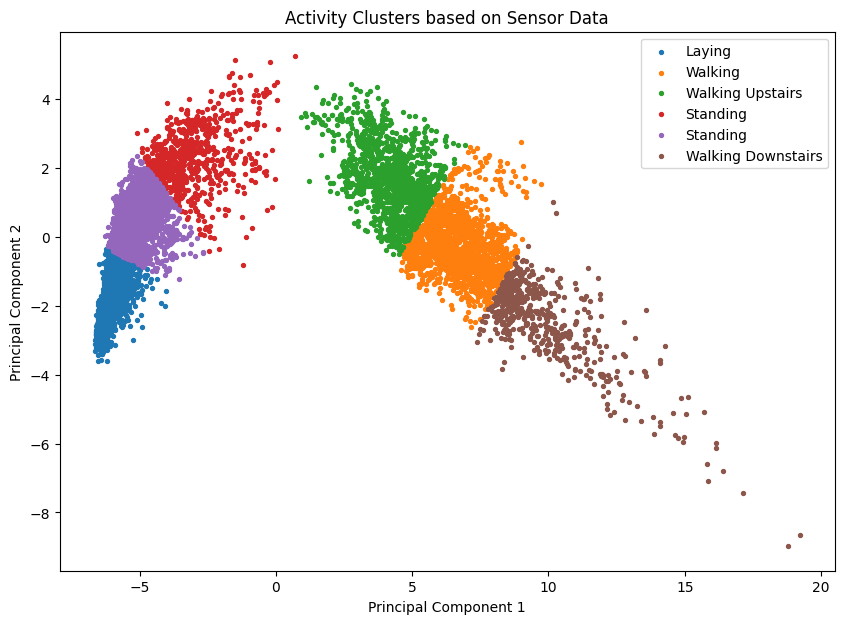

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Map numeric activity labels to names
activity_map = {
    1:"Walking",
    2:"Walking Upstairs",
    3:"Walking Downstairs",
    4:"Sitting",
    5:"Standing",
    6:"Laying"
}

# Convert labels to names
y_labels = y_train[0].map(activity_map)

# Create dataframe to connect cluster + activity
cluster_df = pd.DataFrame({
    "cluster": clusters,
    "activity": y_labels
})

# Find dominant activity per cluster
cluster_activity = cluster_df.groupby("cluster")["activity"] \
                             .agg(lambda x: x.value_counts().index[0])

print("\nCluster → Activity mapping:")
print(cluster_activity)

# Plot with proper labels
plt.figure(figsize=(10,7))

for cluster_id in range(6):
    idx = clusters == cluster_id
    activity_name = cluster_activity[cluster_id]

    plt.scatter(
        X_reduced[idx, 0],
        X_reduced[idx, 1],
        label=activity_name,
        s=8
    )

plt.title("Activity Clusters based on Sensor Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

